In [45]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

wine = load_wine()
col_names = wine.feature_names
print(len(col_names))
X_Data = pd.DataFrame(wine.data,columns = col_names )
y = pd.DataFrame(wine.target)
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3,random_state=0)

13


In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [47]:
print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.976
테스트 세트 정확도: 0.889


In [48]:
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[18  1  0]
 [ 2 18  2]
 [ 0  1 12]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.90      0.82      0.86        22
           2       0.86      0.92      0.89        13

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.89      0.89      0.89        54



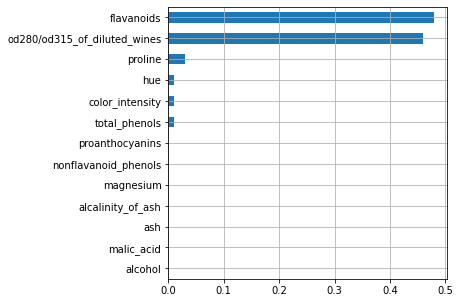

In [49]:
feature_imp =pd.Series(ada.feature_importances_, index=wine.feature_names).sort_values(ascending=True)
feature_imp

feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.963


In [51]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.963


In [52]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.944


In [53]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (test): 0.963
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (test): 0.963
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (test): 0.981
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (test): 0.963
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (test): 0.963
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (test): 0.963
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (test): 0.963


In [54]:
from sklearn.metrics import classification_report
gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



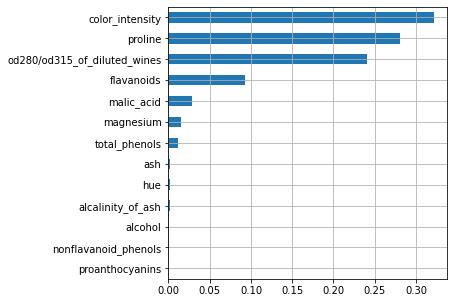

In [55]:
feature_imp =pd.Series(gb_clf2.feature_importances_, index=wine.feature_names).sort_values(ascending=True)
feature_imp
# print(feature_imp)
feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [56]:
from xgboost import plot_importance
from xgboost import XGBClassifier

import xgboost as xgb

In [57]:
xgbb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
X_train = pd.DataFrame(X_train, columns=wine.feature_names)
X_test = pd.DataFrame(X_test, columns=wine.feature_names)
xgbb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
print("훈련 세트 정확도: {:.3f}".format(xgbb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgbb.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.963


In [59]:
fscore = xgbb.get_booster().get_fscore()
score_f= sorted(fscore.items(),key=(lambda x:x[1]), reverse=True)
print(score_f)


[('color_intensity', 151), ('proline', 118), ('flavanoids', 93), ('malic_acid', 58), ('alcohol', 57), ('magnesium', 55), ('total_phenols', 34), ('hue', 32), ('od280/od315_of_diluted_wines', 27), ('alcalinity_of_ash', 22), ('ash', 17), ('proanthocyanins', 12), ('nonflavanoid_phenols', 9)]


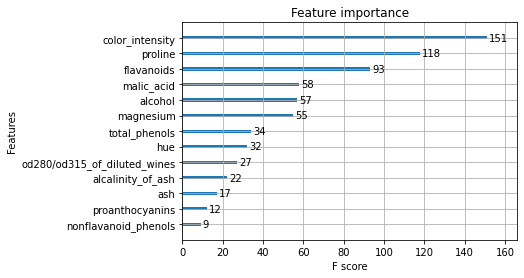

In [60]:
import matplotlib.pyplot as plt
plot_importance(xgbb)
plt.show()

In [61]:
evals= [(X_test, y_test)]

In [62]:
xgbb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric= "mlogloss", eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:0.97868
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:0.884696
[2]	validation_0-mlogloss:0.803847
[3]	validation_0-mlogloss:0.729879
[4]	validation_0-mlogloss:0.66679
[5]	validation_0-mlogloss:0.613629
[6]	validation_0-mlogloss:0.565266
[7]	validation_0-mlogloss:0.521635
[8]	validation_0-mlogloss:0.481281
[9]	validation_0-mlogloss:0.446401
[10]	validation_0-mlogloss:0.415522
[11]	validation_0-mlogloss:0.387958
[12]	validation_0-mlogloss:0.364007
[13]	validation_0-mlogloss:0.342541
[14]	validation_0-mlogloss:0.322741
[15]	validation_0-mlogloss:0.305223
[16]	validation_0-mlogloss:0.289273
[17]	validation_0-mlogloss:0.275719
[18]	validation_0-mlogloss:0.26347
[19]	validation_0-mlogloss:0.250706
[20]	validation_0-mlogloss:0.240992
[21]	validation_0-mlogloss:0.231796
[22]	validation_0-mlogloss:0.224526
[23]	validation_0-mlogloss:0.21675
[24]	validation_0-mlogloss:0.209522
[25]	validation_0-mlogloss:0.202891
[26]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def get_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred,  average='macro')
#     recall = recall_score(y_test, y_pred,                                    
#                                            average='macro')
#     f_scro= f1_score(y_test, y_pred,                                    
#                                            average='macro')
    print('\n정확도: {:.4f}'.format(accuracy))
#     print('정밀도: {:.4f}'.format(precision))
#     print('재현율: {:.4f}'.format(recall))
#     print('fscore: {:.4f}'.format(f_scro))


In [64]:

xgb_wrapper = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=400,objective = 'multi:softmax',
              random_state=42)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, 
                eval_metric='mlogloss', eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_eval(y_test, ws10_preds)

[0]	validation_0-mlogloss:1.08622
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.07474
[2]	validation_0-mlogloss:1.06352
[3]	validation_0-mlogloss:1.05181
[4]	validation_0-mlogloss:1.04084
[5]	validation_0-mlogloss:1.0296
[6]	validation_0-mlogloss:1.01858
[7]	validation_0-mlogloss:1.00798
[8]	validation_0-mlogloss:0.997255
[9]	validation_0-mlogloss:0.986995
[10]	validation_0-mlogloss:0.977282
[11]	validation_0-mlogloss:0.967205
[12]	validation_0-mlogloss:0.957016
[13]	validation_0-mlogloss:0.947709
[14]	validation_0-mlogloss:0.938347
[15]	validation_0-mlogloss:0.928901
[16]	validation_0-mlogloss:0.919468
[17]	validation_0-mlogloss:0.910484
[18]	validation_0-mlogloss:0.901659
[19]	validation_0-mlogloss:0.89251
[20]	validation_0-mlogloss:0.883697
[21]	validation_0-mlogloss:0.87548
[22]	validation_0-mlogloss:0.866979
[23]	validation_0-mlogloss:0.858498
[24]	validation_0-mlogloss:0.850026
[25]	validation_0-mlogloss:0.842023
[26]	validation_

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
xg = XGBClassifier()

param_grid={
    'max_depth':[1,2,3,4],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}

In [67]:
gcv=GridSearchCV(xg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [1, 2, 3, 4], 'n_estimators': [50, 100]},
             pre_dispatch='2*n_jo

In [68]:
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)

final params {'learning_rate': 0.15, 'max_depth': 1, 'n_estimators': 100}
best score 0.9676666666666666


In [69]:
cv_result_df=pd.DataFrame(gcv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)


In [70]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
25,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",0.967667,1
17,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.959333,2
8,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.951667,3
9,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.951333,4
24,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",0.951333,4
16,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.951333,4
27,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.943667,7
23,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.943667,7
28,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.943667,7
29,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.943667,7


In [71]:
xg_cv = XGBClassifier(learing_rate=0.01, max_depth= 4, n_estimators= 50)

In [72]:
xg_cv.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learing_rate=0.01, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [73]:
predictions = xg_cv.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [74]:
from lightgbm import LGBMClassifier , plot_importance

In [75]:
lgb = LGBMClassifier(n_estimators=500,random_state=42)
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
print("훈련 세트 정확도: {:.3f}".format(lgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lgb.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.963


In [77]:
evals= [(X_test, y_test)]

In [78]:
lgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric= "logloss", eval_set=evals, verbose=True)

[1]	valid_0's multi_logloss: 0.976016	valid_0's multi_logloss: 0.976016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.888831	valid_0's multi_logloss: 0.888831
[3]	valid_0's multi_logloss: 0.816757	valid_0's multi_logloss: 0.816757
[4]	valid_0's multi_logloss: 0.752172	valid_0's multi_logloss: 0.752172
[5]	valid_0's multi_logloss: 0.696008	valid_0's multi_logloss: 0.696008
[6]	valid_0's multi_logloss: 0.645174	valid_0's multi_logloss: 0.645174
[7]	valid_0's multi_logloss: 0.600729	valid_0's multi_logloss: 0.600729
[8]	valid_0's multi_logloss: 0.560938	valid_0's multi_logloss: 0.560938
[9]	valid_0's multi_logloss: 0.524987	valid_0's multi_logloss: 0.524987
[10]	valid_0's multi_logloss: 0.494277	valid_0's multi_logloss: 0.494277
[11]	valid_0's multi_logloss: 0.461428	valid_0's multi_logloss: 0.461428
[12]	valid_0's multi_logloss: 0.436004	valid_0's multi_logloss: 0.436004
[13]	valid_0's multi_logloss: 0.41068	valid_0's multi_logloss: 0.41068

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

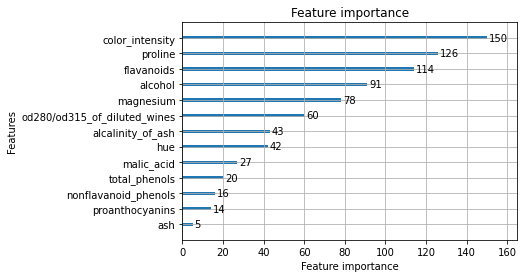

In [79]:
import matplotlib.pyplot as plt
plot_importance(lgb)
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
lb = LGBMClassifier()

param_grid={
    'max_depth':[1,2,3,4],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15],
    'num_leaves': [15],}

In [82]:
lgb_cv=GridSearchCV(lb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
lgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_

In [83]:
print('final params', lgb_cv.best_params_)   # 최적의 파라미터 값 출력
print('best score', lgb_cv.best_score_)

final params {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15}
best score 0.968


In [84]:
cv_result_df=pd.DataFrame(lgb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [85]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
31,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.968000,1
29,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.968000,1
17,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.967667,3
24,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",0.967667,3
25,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",0.967667,3
19,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.960000,6
27,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.960000,6
23,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.959667,8
21,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.959667,8
16,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.959667,8


In [86]:
lb_cv = LGBMClassifier(learing_rate= 0.05, max_depth=12, n_estimators= 100)
lb_cv.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learing_rate=0.05, learning_rate=0.1,
               max_depth=12, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [87]:
predictions = lb_cv.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

